Tarea Análisis Numérico

Dada una función f(x) (especificar rango) determinar el orden de la función si requerimos que :

(R_N(x)) < tolerancia (dada).

Definimos el rango de la función como [-2,2], por lo que la serie de taylor la aproximaremos al rededor de un punto medio del rango, este punto será el 0, asi como una tolerancia al error del 3%.

In [84]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

Aqui especificamos a las variables y la función asi como su expanción en series de taylor

In [85]:
x,y,z = sy.symbols('x y z')
x = sy.symbols('x')
f = (sy.exp(x**2)-(3*sy.cos(x))**2)/sy.log(x)
g = sy.series(f,x,0,5)

In [86]:
print (f)

(exp(x**2) - 9*cos(x)**2)/log(x)


In [87]:
print (g)

-8/log(x) + 10*x**2/log(x) - 5*x**4/(2*log(x)) + O(x**5)


Obtenemos el orden del error y lo quitamos de la función de la expasión de taylor

In [88]:
orden = g.getO()
gx = g.removeO()

Usando el lambdify transformamos las funciones simbólicas en funciones para tratamiento numérico

In [89]:
flam = sy.lambdify(x,f)
glam = sy.lambdify(x,gx)

In [90]:
flam(3)

7367.715840042574

In [91]:
glam(3)

-109.68382680853388

Calcularemos los errores tanto absoluto como relativo

In [92]:
eabs = flam(3) - glam(3)

In [93]:
erel = ((eabs)/flam(3))*100

In [94]:
print (erel)

101.48870870144606


Como el error relativo es muy superior a la tolerancia tenemos que aumentar el número de términos de la serie de taylor para reducir el error por lo que hacemos un ciclo de repetición for.

Esta es una explicación general de lo que trata de lograr que es saber el orden de la función para que el error sea menor a la tolerancia. El codigo que nos permitirá saber el grado de una función evaluado en 3 es el siguiente:


In [83]:
x,y,z = sy.symbols('x y z')
x = sy.symbols('x')
f = (sy.exp(x**2)-(3*sy.cos(x))**2)/sy.log(x)
flam = sy.lambdify(x,f)
for i in range(1,50):
    g = sy.series(f,x,0,i)
    gx = g.removeO()
    glam = sy.lambdify(x,gx)
    eabs = flam(3) - glam(3)
    erel = ((eabs)/flam(3))*100
    if erel <= 3:
        a=i
        break
print("El orden de la función para que el error sea menor o igual a la tolerancia es de : ", a)
print("El error es de: ", erel, "%")
    
    


El orden de la función para que el error sea menor o igual a la tolerancia es de :  31
El error es de:  2.2059672648554463 %


Para visualizar mejor podemos graficar la aproximación contra la función:

<lambdifygenerated-79>:2: RuntimeWarning: divide by zero encountered in log
  return (exp(x**2) - 9*cos(x)**2)/log(x)
<lambdifygenerated-84>:2: RuntimeWarning: divide by zero encountered in log
  return (687809261530759/899430541355357051040000000)*x**30/log(x) + (23717560733683/2067656416908866784000000)*x**28/log(x) + (878428179721/5469990520922928000000)*x**26/log(x) + (35137124977/16830740064378240000)*x**24/log(x) + (1527702199/60980942262240000)*x**22/log(x) + (72747163/263986763040000)*x**20/log(x) + (3829081/1389404016000)*x**18/log(x) + (225097/9081072000)*x**16/log(x) + (15079/75675600)*x**14/log(x) + (1123/831600)*x**12/log(x) + (121/12600)*x**10/log(x) + (11/840)*x**8/log(x) + (17/30)*x**6/log(x) - 5/2*x**4/log(x) + 10*x**2/log(x) - 8/log(x)


Text(0.5, 1.0, 'Gráfica de la función F(X) contra G(X)')

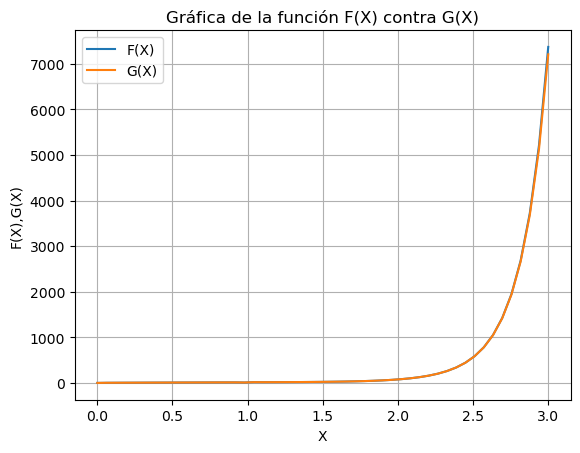

In [99]:
X = np.linspace(0,3)
g = sy.series(f,x,0,31)
gx = g.removeO()
glam = sy.lambdify(x,gx)
YF = flam(X)
YG = glam(X)
plt.plot(X,YF, label = "F(X)")
plt.plot(X,YG, label = "G(X)")
plt.legend(loc=2)
plt.grid(True)
plt.xlabel("X")
plt.ylabel("F(X),G(X)")
plt.title("Gráfica de la función F(X) contra G(X)")

Como podemos observar al error ser tan bajo las gráficas prácticamente se superponen

Ahora podemos comparar el error absoluto con el orden de la función O:

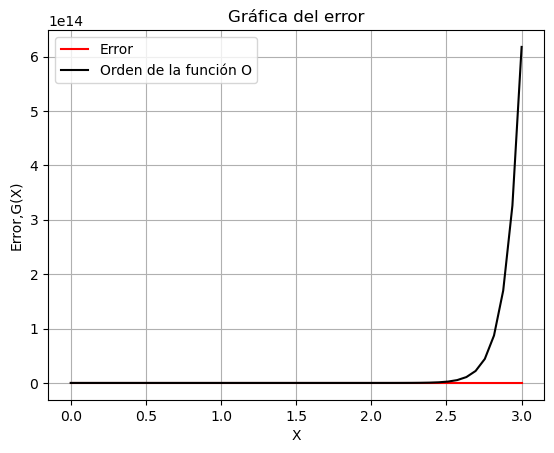

In [101]:
Yerr = np.abs(YF-YG)
Yord = X**31
plt.plot(X,Yerr, label = "Error", color = "Red")
plt.plot(X,Yord, label = "Orden de la función O", color = "Black")
plt.legend(loc=2)
plt.xlabel("X")
plt.ylabel("Error,G(X)")
plt.title("Gráfica del error")
plt.grid(True)

Como la tolerancia al error es baja, de tan solo 3% la aproximación es una buena aproximación por lo que vemos la diferencia entre las gráficas es notable.